In [33]:
import pandas as pd
import sklearn
import numpy as np
from matplotlib import pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
%matplotlib inline
import warnings

# This is to ignore the warnings 
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("HR_comma_sep.csv")
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


<b>Data exploration and visualization</b>

When we go theough the data we see some dicrepancies in it. Some employees have average monthly working hours greater than 300, which is not relevant. Therefore we will be dropping those columns for removing outliers

In [3]:
df[(df['average_montly_hours']>300)]

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
11,0.11,0.81,6,305,4,0,1,0,sales,low
22,0.09,0.95,6,304,4,0,1,0,sales,low
38,0.11,0.89,6,306,4,0,1,0,technical,low
54,0.10,0.92,7,307,4,0,1,0,support,low
57,0.10,0.81,6,309,4,0,1,0,technical,low
...,...,...,...,...,...,...,...,...,...,...
14912,0.11,0.80,6,304,4,0,1,0,technical,low
14929,0.10,0.83,7,302,5,0,1,0,IT,medium
14946,0.10,0.84,5,303,5,0,1,0,accounting,medium
14972,0.11,0.97,6,310,4,0,1,0,accounting,medium


Dropping these columns

In [4]:
df=df[~(df['average_montly_hours']>300)]
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


We also observe some employees have average monthly working hours less than 120, which is also not relevant. Therefore we will be dropping those columns too

In [5]:
df[(df['average_montly_hours']<120)]

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
2074,0.45,0.66,3,111,4,0,0,0,sales,low
2075,0.41,0.47,4,104,3,0,0,0,sales,low
2080,0.69,0.66,5,106,5,0,0,0,sales,low
2085,0.81,0.62,3,100,3,0,0,0,sales,low
2108,0.74,0.76,5,104,4,0,0,0,support,low
...,...,...,...,...,...,...,...,...,...,...
14093,0.60,0.45,3,104,4,0,0,0,IT,low
14106,0.60,0.42,2,109,6,0,0,0,sales,low
14173,0.92,0.64,2,104,7,0,0,0,product_mng,low
14181,0.14,0.38,5,115,6,1,0,0,marketing,high


Dropping these columns too

In [6]:
df=df[~(df['average_montly_hours']<120)]
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


Now we will check for Employees who have left the organization

In [7]:
emp_left = df[df.left==1]
emp_left.shape

(3412, 10)

We will also check for Employees who were retained by the organization

In [8]:
emp_retained = df[df.left==0]
emp_retained.shape

(11039, 10)

Now we will be grouping by employees who left the organization and find the average of all features to determine the root cause

In [9]:
df.groupby('left').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.671073,0.718209,3.791557,202.291874,3.357641,0.174925,0.026180
1,0.454578,0.711559,3.747948,202.839390,3.864596,0.047773,0.005569


The above results show that

1. **Satisfaction Level**: Satisfaction level is low (0.44) in employees leaving the organization
2. **Average Monthly Hours**: Average monthly hours are higher for the employees who left the organizaytion (207.41 vs 197.06)
3. **Promotion Last 5 Years**: Employee do not leave the organizaion if they are promoted

**Comparing salary's affect on Employee retention**

<AxesSubplot:xlabel='salary'>

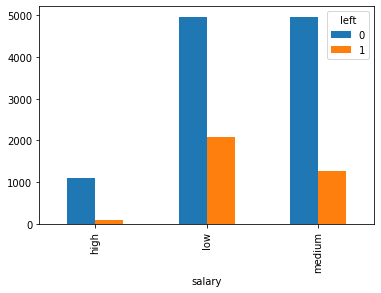

In [10]:
pd.crosstab(df.salary,df.left).plot(kind='bar')

*From the above chart it is quite clear that employees with high salaries are less likely to not leave the organization*

**Comparing department wise employee retention rate**

<AxesSubplot:xlabel='Department'>

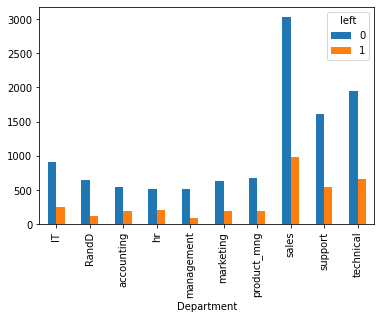

In [11]:
pd.crosstab(df.Department,df.left).plot(kind='bar')

*From the above chart there we observe some impact of department on employee retention but it is not major hence we will ignore department in our analysis*

From the data analysis so far we come to the conclusion that we will b using the following variables as independant variables in our model
1. **Satisfaction Level**
2. **Average Monthly Hours**
3. **Promotion Last 5 Years**
4. **Salary**

In [12]:
independentVar_df = df[['satisfaction_level','average_montly_hours','promotion_last_5years','salary']]
independentVar_df.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary
0,0.38,157,0,low
1,0.80,262,0,medium
2,0.11,272,0,medium
3,0.72,223,0,low
4,0.37,159,0,low


In [13]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

labelEncoder_df=df
labelEncoder_df.salary = le.fit_transform(labelEncoder_df.salary)
labelEncoder_df.head()



,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,1
1,0.80,0.86,5,262,6,0,1,0,sales,2
2,0.11,0.88,7,272,4,0,1,0,sales,2
3,0.72,0.87,5,223,5,0,1,0,sales,1
4,0.37,0.52,2,159,3,0,1,0,sales,1


In [14]:
X = labelEncoder_df[['satisfaction_level','average_montly_hours','promotion_last_5years','salary']].values 
X

array([[3.80e-01, 1.57e+02, 0.00e+00, 1.00e+00],
       [8.00e-01, 2.62e+02, 0.00e+00, 2.00e+00],
       [1.10e-01, 2.72e+02, 0.00e+00, 2.00e+00],
       ...,
       [3.70e-01, 1.43e+02, 0.00e+00, 1.00e+00],
       [1.10e-01, 2.80e+02, 0.00e+00, 1.00e+00],
       [3.70e-01, 1.58e+02, 0.00e+00, 1.00e+00]])

In [15]:
y = labelEncoder_df.left.values
y

array([1, 1, 1, ..., 1, 1, 1])

In [16]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
ct = ColumnTransformer([('town', OneHotEncoder(), [0])], remainder = 'passthrough')




In [17]:
X = ct.fit_transform(X)
X

<14451x95 sparse matrix of type '<class 'numpy.float64'>'
	with 42474 stored elements in Compressed Sparse Row format>

In [18]:
X = X[:,1:]
X

<14451x94 sparse matrix of type '<class 'numpy.float64'>'
	with 42307 stored elements in Compressed Sparse Row format>

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

In [20]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()


In [21]:
model.fit(X_train, y_train)

LogisticRegression()

In [22]:
model.predict(X_test)


array([1, 1, 0, ..., 0, 0, 0])

In [23]:
model.score(X_test,y_test)

0.8869926199261993

In [24]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LogisticRegression(), X, y, cv=cv)

array([0.87997233, 0.88273954, 0.88516084, 0.88481494, 0.87755102])

In [34]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'logistic_regression' : {
            'model': LogisticRegression(),
            'params': {
                
                'C' : [100, 10, 1.0, 0.1, 0.01]
            }
        },
        'KNN':
            { 'model': KNeighborsClassifier(),
                       'params': {#'n_neighbors': range(1,10,2),
                                  'weights': ['uniform', 'distance'],
                                  #'metric': ['euclidean', 'manhattan' ] 
                                 }},
       
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,y)

,model,best_score,best_params
0,logistic_regression,0.882048,{'C': 100}
1,KNN,0.883985,{'weights': 'distance'}
2,decision_tree,0.497945,"{'criterion': 'mse', 'splitter': 'random'}"


We will now retrain our model with the best algo and the best hyperparameter that we found.

In [36]:
model_withBestHyperparameters = KNeighborsClassifier(weights='distance')
model_withBestHyperparameters.fit(X_train,y_train)
y_pred=model_withBestHyperparameters.predict(X_test)
y_pred

array([1, 1, 0, ..., 0, 0, 0])

In [37]:
Precision, recall, f1, support = sklearn.metrics.precision_recall_fscore_support(y_test, y_pred)

print("Precision =", Precision)
print("Recall =", recall)
print("F1-Score =", f1)

Precision = [0.94463888 0.69488684]
Recall = [0.89078908 0.82652044]
F1-Score = [0.91692403 0.75500911]
